# Conducting Sentiment Analysis of Alexa Reviews

# Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [3]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.tail(5)

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [5]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
5       I received the echo as a gift. I needed anothe...
6       Without having a cellphone, I cannot use many ...
7       I think this is the 5th one I've purchased. I'...
8                                             looks great
9       Love it! I’ve listened to songs I haven’t hear...
10      I sent it to my 85 year old Dad, and he talks ...
11      I love it! Learning knew things with it eveyda...
12      I purchased this for my mother who is having k...
13                                     Love, Love, Love!!
14                               Just what I expected....
15                              I love it, wife hates it.
16      Really happy with this purchase.  Great speake...
17      We hav

In [7]:
df['variation']

0           Charcoal Fabric 
1           Charcoal Fabric 
2             Walnut Finish 
3           Charcoal Fabric 
4           Charcoal Fabric 
5       Heather Gray Fabric 
6          Sandstone Fabric 
7           Charcoal Fabric 
8       Heather Gray Fabric 
9       Heather Gray Fabric 
10          Charcoal Fabric 
11          Charcoal Fabric 
12               Oak Finish 
13          Charcoal Fabric 
14               Oak Finish 
15      Heather Gray Fabric 
16      Heather Gray Fabric 
17      Heather Gray Fabric 
18          Charcoal Fabric 
19         Sandstone Fabric 
20          Charcoal Fabric 
21          Charcoal Fabric 
22      Heather Gray Fabric 
23          Charcoal Fabric 
24         Sandstone Fabric 
25         Sandstone Fabric 
26          Charcoal Fabric 
27          Charcoal Fabric 
28          Charcoal Fabric 
29          Charcoal Fabric 
                ...         
3120              Black  Dot
3121              Black  Dot
3122              Black  Dot
3123          

# EDA

In [8]:
positive = df[df['feedback']==1]
negative = df[df['feedback']==0]

In [9]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [10]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
187,2,29-Jul-18,Charcoal Fabric,Really disappointed Alexa has to be plug-in to...,0
205,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0
233,2,29-Jul-18,Sandstone Fabric,I am not super impressed with Alexa. When my P...,0
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out ...,0
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0


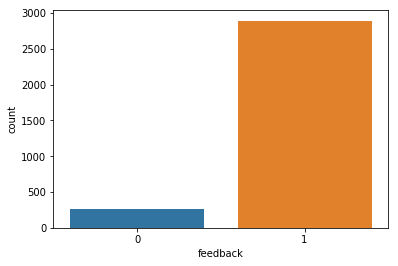

In [11]:
sns.countplot(df['feedback'], label="Count")

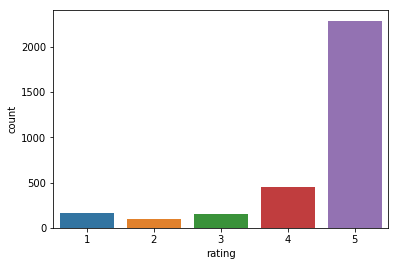

In [12]:
sns.countplot(x = 'rating', data = df)

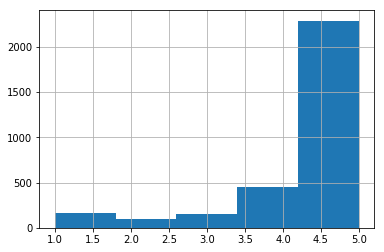

In [13]:
df['rating'].hist(bins = 5)

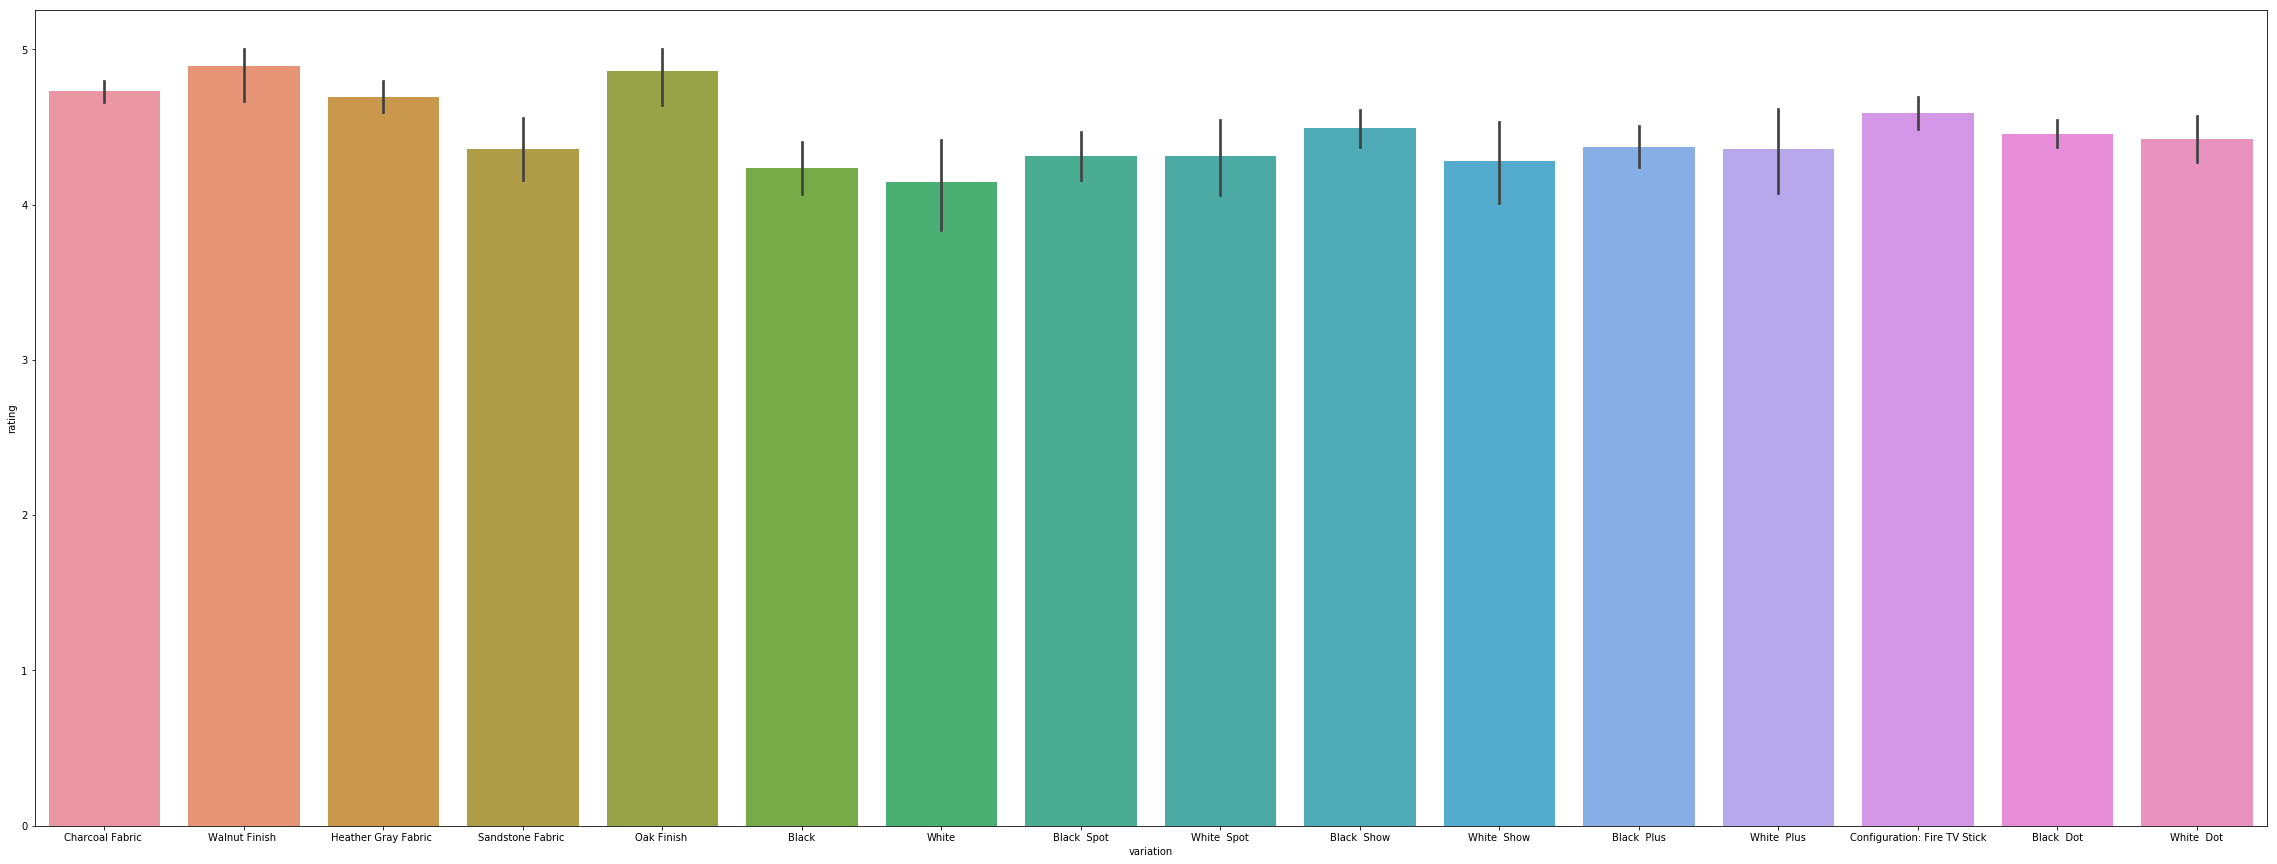

In [14]:
plt.figure(figsize=(40,15))
sns.barplot(x = 'variation', y = 'rating', data = df)

# Data Preprocessing

In [15]:
df = df.drop(['date', 'rating'], axis=1)

In [16]:
df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
5,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,Heather Gray Fabric,looks great,1
9,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [17]:
variation_dummies = pd.get_dummies(df['variation'], drop_first=True)

In [18]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
df.drop(['variation'], axis = 1, inplace = True)

In [20]:
df = pd.concat([df, variation_dummies],axis=1)

In [21]:
df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,I received the echo as a gift. I needed anothe...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,"Without having a cellphone, I cannot use many ...",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,I think this is the 5th one I've purchased. I'...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,looks great,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,Love it! I’ve listened to songs I haven’t hear...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer()

In [24]:
alexa_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [25]:
alexa_countvectorizer.shape

(3150, 4044)

In [26]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [27]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
df.drop(['verified_reviews'], axis=1, inplace=True)

In [29]:
df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
encoded_reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [31]:
df = pd.concat([df, encoded_reviews], axis = 1)

In [32]:
df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = df.drop(['feedback'], axis = 1)

In [34]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X.shape

(3150, 4059)

In [36]:
y = df['feedback']

In [37]:
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3120    1
3121    1
3122    1
3123    1
3124    1
3125    1
3126    1
3127    1
3128    1
3129    1
3130    1
3131    1
3132    1
3133    1
3134    1
3135    1
3136    1
3137    1
3138    1
3139    1
3140    1
3141    1
3142    1
3143    1
3144    1
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

# Training the Model

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [39]:
X_train.shape

(2520, 4059)

In [40]:
X_test.shape

(630, 4059)

In [41]:
y_train.shape

(2520,)

In [42]:
y_test.shape

(630,)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Evaluating the Model

In [44]:
y_predict_train = randomforest_classifier.predict(X_train)

In [45]:
y_predict_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
cm = confusion_matrix(y_train, y_predict_train)

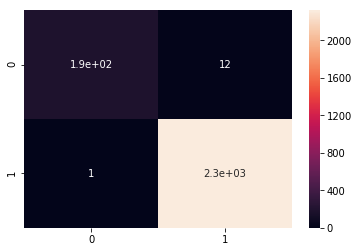

In [47]:
sns.heatmap(cm, annot=True)

In [48]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       198
           1       0.99      1.00      1.00      2322

   micro avg       0.99      0.99      0.99      2520
   macro avg       0.99      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



In [49]:
y_predict = randomforest_classifier.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_predict)

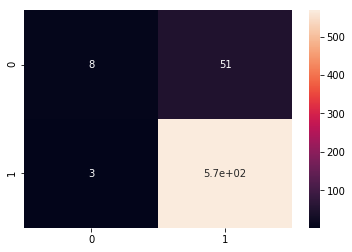

In [51]:
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.14      0.23        59
           1       0.92      0.99      0.95       571

   micro avg       0.91      0.91      0.91       630
   macro avg       0.82      0.57      0.59       630
weighted avg       0.90      0.91      0.89       630



# Improving the Model

In [53]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [54]:
df_alexa = pd.concat([df_alexa, pd.DataFrame(alexa_countvectorizer.toarray())], axis=1)

In [55]:
df_alexa

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)

In [57]:
df_alexa

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,172
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,365
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114


In [58]:
X = df_alexa.drop(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], axis = 1)

In [59]:
X

,0,1,2,3,4,5,6,7,8,9,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,172
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,172
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,365
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,221
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114


In [60]:
y = df_alexa['feedback']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

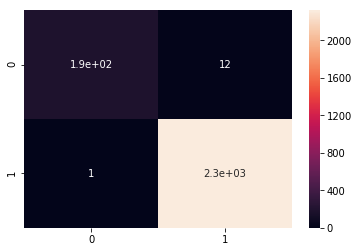

In [65]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.14      0.23        59
           1       0.92      0.99      0.95       571

   micro avg       0.91      0.91      0.91       630
   macro avg       0.82      0.57      0.59       630
weighted avg       0.90      0.91      0.89       630

